## Modified dispersion GWs

The plan is to get some frequency waveform data, modify it according to loretnz violating theories and then plot it as seen from some detectors. Will try and add some statistical analysis for this, but really this is just to get used to the tools.

In [ ]:
import matplotlib.pyplot as plt
import warnings
from pycbc.detector import Detector
from pycbc.waveform import get_fd_waveform, get_td_waveform



warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

model = "IMRPhenomXP"


/usr/local/lib64/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
/usr/local/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


/usr/local/lib64/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib64/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-2.0, 0.0)

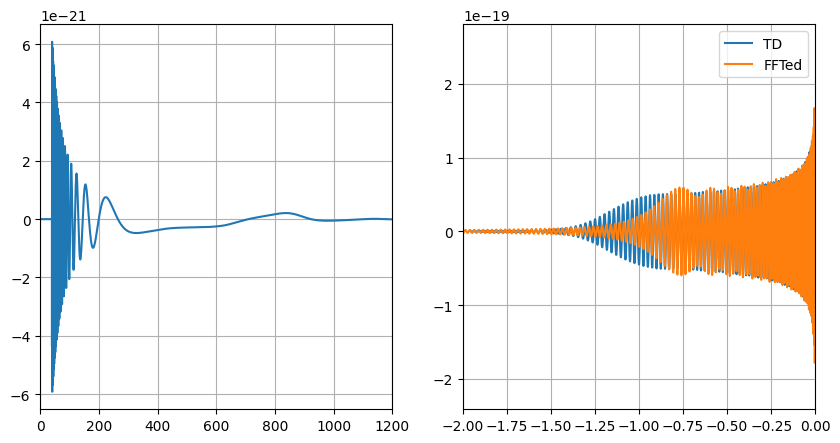

In [14]:
# Generating waveforms for arbitrary cbc
# Doing a comparison of the TD waveforms because fft will introduce issues

fp, fc = get_fd_waveform(approximant=model,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_f=0.1,
                                 f_lower=40)

hp, hc = get_td_waveform(approximant=model,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_t=0.001,
                                 f_lower=40)


#just doing this for plus atm, probably worth investigating cross later

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].plot(fp.sample_frequencies, fp)
axs[0].set_xlim([0,1200])
axs[0].grid()


ffted_data = fp.to_timeseries()
axs[1].plot(hp.sample_times, hp, label="TD")
axs[1].plot(ffted_data.sample_times, ffted_data, label="FFTed")
axs[1].grid()
axs[1].legend()
axs[1].set_xlim([-2,0])







Clear that theres some issues introduced by the fft, but will ignore for now

## Making modification to the waves
Built off of this paper [https://arxiv.org/pdf/1110.2720]. This introduces a frequency dependant phase shift in the frequency domain based on two parameters $A_\alpha$ and $\alpha$, in the equation

$$
E^2 = m^2 p^2 + A_\alpha m^\alpha p^\alpha
$$

Going to focus on $\alpha$ != 1 for the time being